In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns


In [139]:
#Load the previous saved dataset for visualization
data_df = pd.read_csv('./source/Dataset/analysis_copy.csv')

In [125]:
data_df.head()

,date,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,...,occupation,smoke,weight,disease,age_years,bmi,bp_normal,bp_elevated,bp_hypertension1,bp_hypertension2
0,2021-05-03,Indonesia,0,1,0,110,80,1,2,1,...,Architect,0,62.0,0,50,21.967120,0,0,1,0
1,2021-08-05,Malaysia,1,1,0,140,90,3,1,1,...,Accountant,0,85.0,1,55,34.927679,0,0,0,1
2,2022-11-13,Indonesia,2,0,0,130,70,3,1,1,...,Chef,0,64.0,1,51,23.507805,0,0,1,0
3,2018-10-31,Singapore,3,1,0,150,100,1,2,1,...,Lawyer,0,82.0,1,48,28.710479,0,0,0,1
4,2020-09-25,Singapore,4,0,0,100,60,1,1,1,...,Architect,0,56.0,0,47,23.011177,1,0,0,0


In [126]:
data_df.age_years.unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30])

STUDY GROUP A: AGE GROUP 30s

In [140]:
data_30_df = data_df[(data_df.age_years > 29) & (data_df.age_years < 40) & (data_df.disease == 0)]
#data_30_df = data_df[(data_df.age_years > 59) & (data_df.disease == 1)]
data_30_df.shape

(1341, 21)

In [141]:
data_30_df.age_years.unique()

array([39, 30])

In [144]:
#define the number males and females
males_count = data_30_df['gender'].value_counts()
males_count

gender
1    847
2    494
Name: count, dtype: int64

In [146]:
#First create sample of evenly balanced Males and Females
males = data_30_df[data_30_df['gender'] == 2].sample(n=100, random_state=42)
females = data_30_df[data_30_df['gender'] == 1].sample(n=100, random_state=42)

balanced_dataset = pd.concat([males, females])

len(balanced_dataset)


200

In [147]:
data_30_df = balanced_dataset

What are they habit?

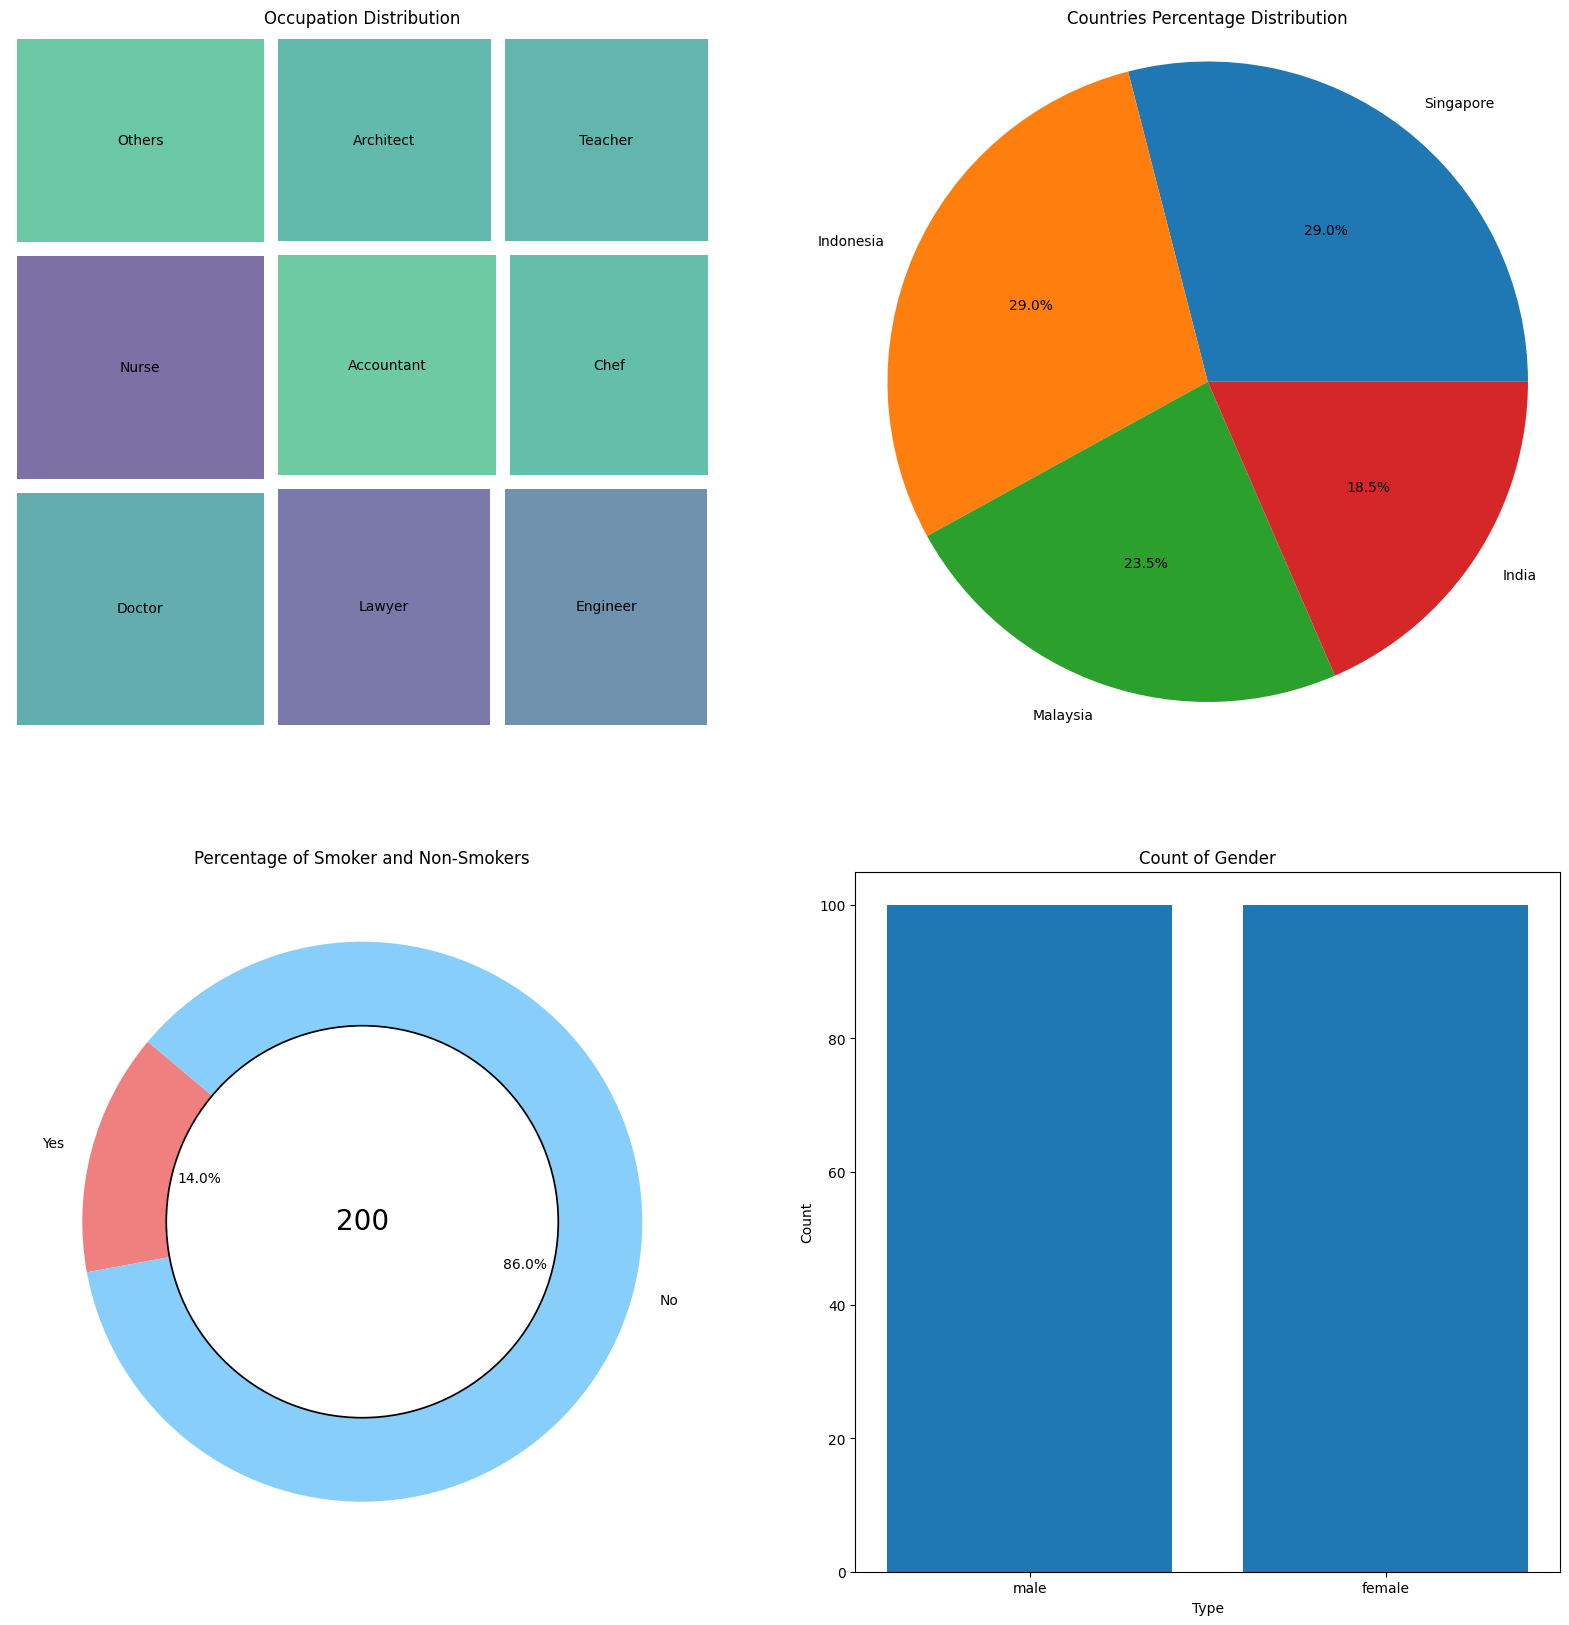

In [148]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)

#x_axi = data_30_df.occupation.drop_duplicates().values

occupation_counts = data_30_df.occupation.value_counts()

# Create bar chart
#plt.bar(occupation_counts.index, occupation_counts.values)
squarify.plot(sizes=occupation_counts.values, label=occupation_counts.index, alpha=0.7, pad= 0.25)

plt.axis("off")

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Occupation Distribution')


#2
plt.subplot(2,2,2)
country_counts = data_30_df.country.value_counts()

# Create pie chart
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Countries Percentage Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


#Chart 3
plt.subplot(2,2,3)
#smoke_counts = data_30_df['smoke'].value_counts()
#smoke_counts = data_30_df['smoke']

no_of_1s = len(data_30_df[data_30_df['smoke'] == 1])
no_of_0s = len(data_30_df[data_30_df['smoke'] == 0])

#no_of_0s = 20
#no_of_1s = 80

total_smokecount = no_of_0s + no_of_1s

labels = ['Yes', 'No']
sizes = [no_of_1s, no_of_0s]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#plt.pie(sizes, labels, colors, autopct='%1.1f%%', startangle=140)
centerpie = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=1.25, )
pie_fig = plt.gcf()
pie_fig.gca().add_artist(centerpie)

plt.title("Percentage of Smoker and Non-Smokers")
plt.text(0,0, total_smokecount, ha='center', va='center', fontsize=20)


#chart4
plt.subplot(2,2,4)

gmap = {1: 'female', 2: 'male'}
genders = data_30_df['gender'].value_counts()
genders.index = genders.index.map(gmap)

bars = plt.bar(genders.index, genders.values, label="Gender Count")
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Count of Gender")


#plt.axis('equals')

#plt.bar(0, smoke_counts.sum(), label='Total')
#plt.bar(0, smoke_counts[0], label='Non Smokers')


# Calculate percentages
#total = sum(smoke_counts)
#percentages = {key: (value / total) * 100 for key, value in smoke_counts.items()}

# Create bar chart
#plt.xlabel('Smoking Status')
#plt.ylabel('Percentage')
#plt.title('Percentage of Smokers and Non-Smokers')
#plt.legend()
#plt.xticks([])

plt.show()

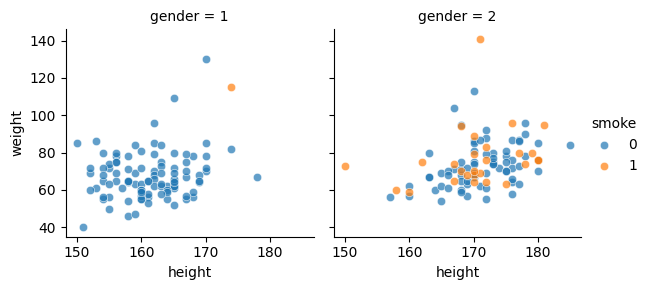

In [149]:
#sns.jointplot(x=data_30_df['height'], y=data_30_df['weight'], data=data_30_df, kind='scatter')
graph = sns.FacetGrid(data_30_df, col='gender', hue='smoke')
graph.map(sns.scatterplot, 'height', 'weight', alpha=0.7)

graph.add_legend()

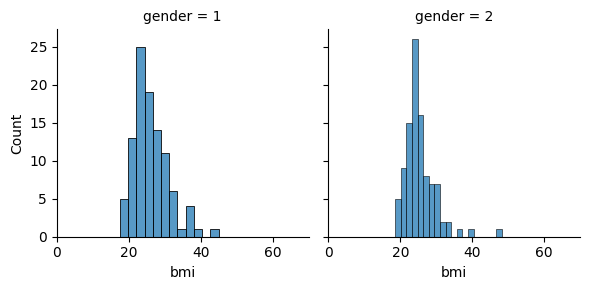

In [150]:
#sns.scatterplot(data=data_30_df, x='weight', y='height', hue='gender', palette='Set1')
#plt.xlabel('Height')
#plt.ylabel('Weight')
#plt.legend(title='Gender')

graph3 = sns.FacetGrid(data=data_30_df, col="gender")
plt.xlim(0, 70)
graph3.map(sns.histplot, 'bmi')

In [132]:
gmap = {1: 'female', 2: 'male'}
genders = data_30_df['gender'].value_counts()
genders.index = genders.index.map(gmap)

genders

gender
female    5543
male      2905
Name: count, dtype: int64